### 项目简介
四轴飞行器或四轴飞行器无人机在个人和专业应用领域都变得越来越热门。它易于操控，并广泛应用于各个领域，从最后一公里投递到电影摄影，从杂技表演到搜救，无所不包。
  
  大多数四轴飞行器有四个提供推力的发动机，虽然有些飞行器有 6 个或 8 个发动机，也叫做四轴飞行器。有多个推力点并且重力在中心位置改善了稳定性，可以完成多种飞行动作。

但是也存在一定的代价，此类飞行器控制起来非常复杂，几乎无法手动控制每个发动机的推力。因此大部分商业四轴飞行器通过接受一个推力大小和俯仰/偏航/翻滚控件简化飞行控件，这样操作起来更直观并且更有趣。

下一步改进是让四轴飞行器能够自动完成一些控制行为，例如起飞和着陆。你可以通过经典方法（例如实现 PID 控制器）设计这些控件。或者，你可以使用强化学习构建自己学习这些行为的智能体。我们将在这个项目中采用强化学习方法！

你将使用一个简单的模拟环境，该环境由 Unity 3D 游戏引擎提供支持。你的智能体将通过 ROS（机器人操作系统）与该模拟环境互动。注意，OpenAI Gym 环境的执行步骤与智能体保持同步，而该模拟环境则不同，它将持续实时地运行。因此，你获得的经验元组不能保证在一段时间内会保持相同的空间划分。你的智能体在每次观察时将获得时间戳，可能需要考虑这些时间戳。


### 设置
首先，请克隆此 GitHub 代码库并按照[README](https://github.com/udacity/RL-Quadcopter) 中的说明操作，其中的jupyter notebook汉化说明可参见[链接](https://github.com/udacity/cn-deep-learning/tree/master/RL-Quadcopter)；

如果下载RoboVM_V2.1.0.zip有困难，可以通过这个[链接](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/DQN/RoboVM_V2.1.0.zip)下载。

该项目环境的设置有点难度：如果你有疑问，简单问题可以直接群里提问并@助教，助教看到后会及时答疑。

#### 任务设置
请对照以下检查清单确保你成功地完成了每个设置项。
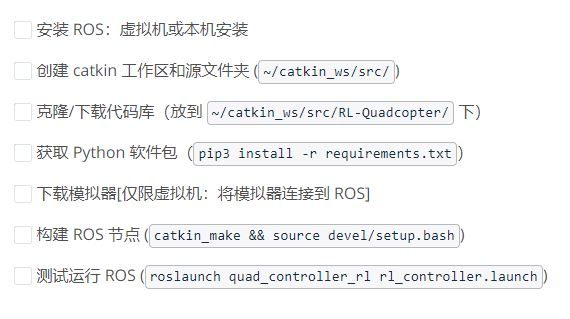


### 3代码审核
运行 ROS 并连接到模拟器后，打开项目notebook。你可以在 ~/catkin_ws/ 目录下运行以下命令：

> jupyter notebook src/RL-Quadcopter/quad_controller_rl/notebooks/RL-Quadcopter.ipynb

按照 notebook 中的说明完成此项目。如果需要其他帮助，请在以下部分查找实用提示和代码段。

#### 任务
整个项目分为以下几个任务。对于每个任务，你都需要训练强化学习智能体成功地完成该任务。

- 任务 1：起飞
- 任务 2：悬停
- 任务 3：着陆
- 任务 4：整套动作
每个任务需要一个相关的 Python (.py) 文件来定义该任务，以及如何运行该任务。这些任务文件应该位于以下子目录下：

> RL-Quadcopter/quad_controller_rl/src/quad_controller_rl/tasks/

注意，第一个任务（“起飞”）已包含在项目中，定义为 takeoff.py。你需要定义其他几个任务（项目的任务）！你所定义的任何任务必须衍生自 base_task.py 中定义的基类 BaseTask。可以将每个任务看作与 OpenAI Gym 环境相似。

### 智能体
你的强化学习智能体必须在位于以下位置的 Python (.py) 文件中定义：

> RL-Quadcopter/quad_controller_rl/src/quad_controller_rl/agents/

它们都必须继承在 base_agent.py 中定义的基类 BaseAgent。其中提供了一个示例智能体，它会执行随机策略搜索，但是性能非常糟糕！你可以用它作为模板并定义你自己的智能体，然后在其中实现更强大的学习算法。

**注意** 你可以针对所有任务选择使用相同的智能体/算法，或者为每个任务定义一个新的智能体。

### 4定义任务
正如之前提到的，我们已经在 tasks/takeoff.py 中为你定义了起飞任务。你可以看看该任务，了解任务对象如何充当 ROS 和智能体代码之间的媒介。

- __init__()：定义特定于任务的参数，包括状态（观察结果）空间和动作空间。
- reset()：在每个阶段开始时初始化状态，将无人机扔到地面上。
- update()：当出现新的状态时，ROS 会定期调用该方法。它在每个时间步将该状态传递给智能体，以及奖励值，获得一个动作，然后将该动作传回 ROS。

(ROS 然后将该动作发送给模拟环境，并获得下个状态以提供给 update()。）

任务的奖励函数定义如下：

> reward = -min(abs(self.target_z - pose.position.z), 20.0)

即 reward = 0 表示匹配目标 z，离得越远，则为负数，低达 -20。如果四轴无人机达到目标高度，则获得额外的奖励，如果时间超时，则获得额外的惩罚。

#### 运行任务
运行以下命令以使用默认参数启动 ROS（任务：起飞，智能体：RandomPolicySearch）：

> roslaunch quad_controller_rl rl_controller.launch

这相当于明确指定任务和智能体类名称：

> roslaunch quad_controller_rl rl_controller.launch task:=Takeoff agent:=RandomPolicySearch

现在运行模拟器可执行文件。它应该会启动并显示“Connected to ROS”，并且左下角有绿色的点。

你将发现，在每个阶段开始时，四轴飞行器从很矮的高度掉了下来，落到地面上，然后机翼开始转动。因为智能体一开始遵守的是完全随机的策略，你将看到飞行器到处歪斜着飞行！幸运的话，它可能会升到一定的高度。

#### 示例智能体
我们仔细研究下在 agents/policy_search.py 中定义的示例智能体 RandomPolicySearch。从外部调用了两个方法：

- __init__()：初始化智能体，包括策略参数（随机设定）。它可以访问任务对象，因此可以检查状态空间和动作空间。

- step()：在每个时间步用一个新的状态（观察结果）向量和奖励进行调用。它预期会返回一个属于任务的动作空间的动作。

在这种情况下，step() 方法只是累积每个时间步的奖励，并使用当前策略（act() 方法）返回一个动作。你也可以在此处存储经验元组或执行其他运算。在每个阶段结束时，它都会调用 learn() 方法，该方法会尝试（随机地）更新策略以完善策略，然后通过调用 reset_episode_vars() 为下个阶段做准备。

这个随机策略搜索方法对该项目中的任务来说并不足够，但是你依然可以使用该智能体作为模板并定义你自己的智能体。

#### 你的智能体
要实现你自己的智能体，请在 agents/ 目录下创建一个新的 Python 文件。你可以根据你打算实现的算法/技巧命名它，例如 policy_gradients.py。

现在创建一个继承自 BaseAgent 的类（或者你可以复制示例智能体中的部分，并根据需要加以修改）。例如，假设你要实现深度确定性策略梯度 (DDPG)：

> class DDPG(BaseAgent):
    ...

最后一个事项 - 为了运行智能体，你需要修改 agents/__init__.py 并在其中导入你的智能体类，例如：

> from quad_controller_rl.agents.policy_gradients import DDPG

然后，在启动 ROS 时，你需要在命令行/终端上指定该类名称：

> roslaunch quad_controller_rl rl_controller.launch agent:=DDPG

好了！现在你可以开始实现你的强化学习算法了！理想目标是训练智能体平稳地起飞。


### 5复杂的状态和动作空间
你可能注意到了，结合后的状态动作空间大小非常大。这样可能会导致你开发的任何智能体策略或值函数模型变得更加复杂。

正如在 tasks/takeoff.py 中所定义的，状态向量有 7 个元素，前 3 个表示飞行器在 (x, y, z) 域内的位置，剩下的 4 个表示方向[四元数](https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation)：  

```python
class Takeoff(BaseTask):
    ...
    def update(self, timestamp, pose, angular_velocity, linear_acceleration):
        # Prepare state vector (pose only; ignore angular_velocity, linear_acceleration)
        state = np.array([
            pose.position.x, pose.position.y, pose.position.z,
            pose.orientation.x, pose.orientation.y, pose.orientation.z, pose.orientation.w])
        ...

```

同样，动作向量预计由 6 个元素组成，前 3 个会产生线性推力，剩下 3 个会产生扭矩（旋转力）：

> action = [force_x, force_y, force_z, torque_x, torque_y, torque_z]

但是，所有这些维度可能与手头的问题不相关。例如，为了成功地起飞，你只需知道飞行器的位置（状态向量的前 3 个元素），可以忽略方向。同样，你只需应用线性推力（同样是动作向量的前 3 个元素），不需要应用扭矩（这样还会防止出现不必要的旋转和歪斜）。

### 限制状态和动作空间
你可以在智能体代码中选择使用提供的状态向量的子集，并有效地限制在特定动作向量维度里采取的动作。为此，首先指定缩减状态和动作空间的大小，然后用来创建策略参数、神经网络模型，等等。

```python
class MyAgent(BaseAgent):
    ...
    def __init__(self, task):
        ...
        # Constrain state and action spaces
        self.state_size = 3  # position only
        self.action_size = 3  # force only
        print("Original spaces: {}, {}\nConstrained spaces: {}, {}".format(
            self.task.observation_space.shape, self.task.action_space.shape,
            self.state_size, self.action_size))
        ...

```

然后你可以定义两个辅助函数 - 一个用来在使用每个状态向量前预处理向量，另一个用来在返回每个动作向量前后处理向量：

```python
def preprocess_state(self, state):
        """Reduce state vector to relevant dimensions."""
        return state[0:3]  # position only

    def postprocess_action(self, action):
        """Return complete action vector."""
        complete_action = np.zeros(self.task.action_space.shape)  # shape: (6,)
        complete_action[0:3] = action  # linear force only
        return complete_action

```
最后，从 step() 中调用这些方法：
```python

def step(self, state, reward, done):
        # Reduce state vector
        state = preprocess_state(state)
        ...
        # Transform state, choose action, save experience, learn, etc.
        ...
        # Return complete action vector
        return postprocess_action(action)
```

如果你发现你的智能体学习效果不好，或者学习速度不快，请尝试限制状态和/或动作空间。你可以选择不同的维度子集，看看哪个效果最好。

### 6编写阶段统计信息
在对强化学习解决方案进行迭代时，有必要衡量智能体的效果。最简单的跟踪指标是在每个阶段获取的总奖励（正如在示例智能体中所演示的那样）。

将这些（以及其他）统计信息保存到文件中会有帮助，以供以后分析。例如，阶段奖励逐渐增加表明智能体在学习。

一种方法是使用 Pandas 将阶段统计信息记录到 CSV 文件中。首先，在智能体的 __init__() 方法中初始化一些变量：
```python
import os
import pandas as pd
from quad_controller_rl import util

class MyAgent(BaseAgent):
    ...
    def __init__(self, task):
        ...
        # Save episode stats
        self.stats_filename = os.path.join(
            util.get_param('out'),
            "stats_{}.csv".format(util.get_timestamp()))  # path to CSV file
        self.stats_columns = ['episode', 'total_reward']  # specify columns to save
        self.episode_num = 1
        print("Saving stats {} to {}".format(self.stats_columns, self.stats_filename))  # [debug]

```
这里，我们可以使用实用函数 util.get_param('out') 获取目标输出目录。默认目录是 quad_controller_rl/out/，但是你在调用 roslaunch 时可以自己指定目录：

> roslaunch quad_controller_rl rl_controller.launch out:=<complete path>

然后定义一个辅助函数来写入 CSV 文件：
```python
    def write_stats(self, stats):
        """Write single episode stats to CSV file."""
        df_stats = pd.DataFrame([stats], columns=self.stats_columns)  # single-row dataframe
        df_stats.to_csv(self.stats_filename, mode='a', index=False,
            header=not os.path.isfile(self.stats_filename))  # write header first time only
```
然后在每个阶段结束时从 step() 调用它：
```python
        ...
        if done:
            # Write episode stats
            self.write_stats([self.episode_num, self.total_reward])
            self.episode_num += 1
```
### 绘制阶段统计信息
运行完毕后（你可以随时在终端内按下 Ctrl+C 键结束运行），可以轻松地将 CSV 文件加载到 Pandas 中进行绘制。
```python 
import pandas as pd

df_stats = pd.read_csv(<CSV filename>)
df_stats[['total_reward']].plot(title="Episode Rewards")
```

提示：如果你位于 catkin 工作区 (~/catkin_ws/)，运行 devel/setup.bash 以将项目代码包含在当前 PYTHONPATH 中。然后，你可以从该项目中导入模块，例如，util.py 中有一个便利函数可以用来绘制阶段奖励（或者 CSV 文件中的任何统计信息）：

>from quad_controller_rl import util
util.plot_stats(<CSV filename>, title="Episode Rewards")

### 7回放缓冲区
大多数现代强化学习算法都使用一个回放存储器或缓冲区来存储和回调经验元组。

首先，你可以定义一个很小的数据结构来存储每个经验元组：

>from collections import namedtuple
Experience = namedtuple("Experience",
    field_names=["state", "action", "reward", "done", "next_state"])

然后你可以定义一个回放缓冲区类，以存储 Experience 对象列表。为了避免耗尽计算机的内存，建议为你的缓冲区定义大小上限，并使用循环缓冲区（旧内存被新内存覆盖）等列表。

尝试在下面的编程练习中实现该功能，即 add() 和 sample() 方法。点击测试答案以执行你的代码并点击提交以对其运行测试。尝试自己实现该功能，但是如果遇到问题，可以看一眼解决方案 。

**注:** 
参建文件夹L14，replay_buffer.py, solution.py


### 8DDPG：行动者
#### 深度确定性策略梯度 (DDPG)

你可以使用很多种不同的算法来设计智能体，只要它适合连续状态和动作空间即可。一种热门方法是深度确定性策略梯度，简称 DDPG。它实际上是一种行动者-评论者方法，但是关键在于底层的策略函数本身确定性函数，从外部添加了一些噪点，以便采取的动作具有理想的随机性。

我们来实现原始论文中给出的算法：

> Lillicrap、Timothy P. 等，2015 年深度强化学习连续控制。[pdf](https://arxiv.org/pdf/1509.02971.pdf)

可以使用最现代的深度学习库（例如 Keras 或 TensorFlow）实现该算法的两大组件 - 行动者和评论者网络。

#### DDPG：行动者（策略）模型
以下是使用 Keras 定义的一个非常简单的行动者模型。
```python
from keras import layers, models, optimizers
from keras import backend as K

class Actor:
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, action_low, action_high):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            action_low (array): Min value of each action dimension
            action_high (array): Max value of each action dimension
        """
        self.state_size = state_size
        self.action_size = action_size
        self.action_low = action_low
        self.action_high = action_high
        self.action_range = self.action_high - self.action_low

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build an actor (policy) network that maps states -> actions."""
        # Define input layer (states)
        states = layers.Input(shape=(self.state_size,), name='states')

        # Add hidden layers
        net = layers.Dense(units=32, activation='relu')(states)
        net = layers.Dense(units=64, activation='relu')(net)
        net = layers.Dense(units=32, activation='relu')(net)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Add final output layer with sigmoid activation
        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)

        # Scale [0, 1] output for each action dimension to proper range
        actions = layers.Lambda(lambda x: (x * self.action_range) + self.action_low,
            name='actions')(raw_actions)

        # Create Keras model
        self.model = models.Model(inputs=states, outputs=actions)

        # Define loss function using action value (Q value) gradients
        action_gradients = layers.Input(shape=(self.action_size,))
        loss = K.mean(-action_gradients * actions)

        # Incorporate any additional losses here (e.g. from regularizers)

        # Define optimizer and training function
        optimizer = optimizers.Adam()
        updates_op = optimizer.get_updates(params=self.model.trainable_weights, loss=loss)
        self.train_fn = K.function(
            inputs=[self.model.input, action_gradients, K.learning_phase()],
            outputs=[],
            updates=updates_op)

```

注意，输出层生成的原始动作位于 [0.0, 1.0] 范围内（使用 sigmoid 激活函数）。因此，我们添加另一个层级，该层级会针对每个动作维度将每个输出缩放到期望的范围。这样会针对任何给定状态向量生成确定性动作。稍后将向此动作添加噪点，以生成某个探索性行为。

另一个需要注意的是损失函数如何使用动作值（Q 值）梯度进行定义：

>##### Define loss function using action value (Q value) gradients
action_gradients = layers.Input(shape=(self.action_size,))
loss = K.mean(-action_gradients * actions)

这些梯度需要使用评论者模型计算，并在训练时提供梯度。因此指定为在训练函数中使用的“输入”的一部分：
```
self.train_fn = K.function(
   inputs=[self.model.input, action_gradients, K.learning_phase()],
    outputs=[],
    updates=updates_op)
```

### 9DDPG：评论者（值）模型
相应的评论者模型可以如下所示：
```python
class Critic:
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
        """
        self.state_size = state_size
        self.action_size = action_size

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        # Define input layers
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')

        # Add hidden layer(s) for state pathway
        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        # Add hidden layer(s) for action pathway
        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Combine state and action pathways
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)

        # Add more layers to the combined network if needed

        # Add final output layer to prduce action values (Q values)
        Q_values = layers.Dense(units=1, name='q_values')(net)

        # Create Keras model
        self.model = models.Model(inputs=[states, actions], outputs=Q_values)

        # Define optimizer and compile model for training with built-in loss function
        optimizer = optimizers.Adam()
        self.model.compile(optimizer=optimizer, loss='mse')

        # Compute action gradients (derivative of Q values w.r.t. to actions)
        action_gradients = K.gradients(Q_values, actions)

        # Define an additional function to fetch action gradients (to be used by actor model)
        self.get_action_gradients = K.function(
            inputs=[*self.model.input, K.learning_phase()],
            outputs=action_gradients)
```

它在某些方面比行动者模型简单，但是需要注意几点。首先，行动者模型旨在将状态映射到动作，而评论者模型需要将（状态、动作）对映射到它们的 Q 值。这一点体现在了输入层中。
```
# Define input layers
states = layers.Input(shape=(self.state_size,), name='states')
actions = layers.Input(shape=(self.action_size,), name='actions')
```
这两个层级首先可以通过单独的“路径”（迷你子网络）处理，但是最终需要结合到一起。例如，可以通过使用 Keras 中的 Add 层级类型来实现（请参阅合并层级）：

```
# Combine state and action pathways
net = layers.Add()([net_states, net_actions])
```
该模型的最终输出是任何给定（状态、动作）对的 Q 值。但是，我们还需要计算此 
Q 值相对于相应动作向量的梯度，以用于训练行动者模型。这一步需要明确执行，并且需要定义一个单独的函数来访问这些梯度：

```
# Compute action gradients (derivative of Q values w.r.t. to actions)
# Compute action gradients (derivative of Q values w.r.t. to actions)
action_gradients = K.gradients(Q_values, actions)

# Define an additional function to fetch action gradients (to be used by actor model)
self.get_action_gradients = K.function(
    inputs=[*self.model.input, K.learning_phase()],
    outputs=action_gradients)
```

### 10DDPG智能体

现在我们可以将行动者模型和策略模型放到一起，构建 DDPG 智能体了。注意，我们需要每个模型的两个副本，一个本地副本，一个目标副本。该技巧来自深度 Q 学习中的“固定 Q 目标”，用于拆分被更新的参数和生成目标值的参数。

以下是智能体类的纲要：
```python
class DDPG(BaseAgent):
    """Reinforcement Learning agent that learns using DDPG."""
    def __init__(self, task):
        ...
        # Actor (Policy) Model
        self.action_low = self.task.action_space.low
        self.action_high = self.task.action_space.high
        self.actor_local = Actor(self.state_size, self.action_size, self.action_low, self.action_high)
        self.actor_target = Actor(self.state_size, self.action_size, self.action_low, self.action_high)

        # Critic (Value) Model
        self.critic_local = Critic(self.state_size, self.action_size)
        self.critic_target = Critic(self.state_size, self.action_size)

        # Initialize target model parameters with local model parameters
        self.critic_target.model.set_weights(self.critic_local.model.get_weights())
        self.actor_target.model.set_weights(self.actor_local.model.get_weights())

        # Noise process
        self.noise = OUNoise(self.action_size)

        # Replay memory
        self.buffer_size = 100000
        self.batch_size = 64
        self.memory = ReplayBuffer(self.buffer_size)

        # Algorithm parameters
        self.gamma = 0.99  # discount factor
        self.tau = 0.001  # for soft update of target parameters
        ...

    def step(self, state, reward, done):
        ...
        # Choose an action
        action = self.act(state)

        # Save experience / reward
        if self.last_state is not None and self.last_action is not None:
            self.memory.add(self.last_state, self.last_action, reward, state, done)
        ...
        # Learn, if enough samples are available in memory
        if len(self.memory) > self.batch_size:
            experiences = self.memory.sample(self.batch_size)
            self.learn(experiences)
        ...

    def act(self, states):
        """Returns actions for given state(s) as per current policy."""
        states = np.reshape(states, [-1, self.state_size])
        actions = self.actor_local.model.predict(states)
        return actions + self.noise.sample()  # add some noise for exploration

    def learn(self, experiences):
        """Update policy and value parameters using given batch of experience tuples."""
        # Convert experience tuples to separate arrays for each element (states, actions, rewards, etc.)
        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.array([e.action for e in experiences if e is not None]).astype(np.float32).reshape(-1, self.action_size)
        rewards = np.array([e.reward for e in experiences if e is not None]).astype(np.float32).reshape(-1, 1)
        dones = np.array([e.done for e in experiences if e is not None]).astype(np.uint8).reshape(-1, 1)
        next_states = np.vstack([e.next_state for e in experiences if e is not None])

        # Get predicted next-state actions and Q values from target models
        #     Q_targets_next = critic_target(next_state, actor_target(next_state))
        actions_next = self.actor_target.model.predict_on_batch(next_states)
        Q_targets_next = self.critic_target.model.predict_on_batch([next_states, actions_next])

        # Compute Q targets for current states and train critic model (local)
        Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
        self.critic_local.model.train_on_batch(x=[states, actions], y=Q_targets)

        # Train actor model (local)
        action_gradients = np.reshape(self.critic_local.get_action_gradients([states, actions, 0]), (-1, self.action_size))
        self.actor_local.train_fn([states, action_gradients, 1])  # custom training function

        # Soft-update target models
        self.soft_update(self.critic_local.model, self.critic_target.model)
        self.soft_update(self.actor_local.model, self.actor_target.model)

    def soft_update(self, local_model, target_model):
        """Soft update model parameters."""
        local_weights = np.array(local_model.get_weights())
        target_weights = np.array(target_model.get_weights())

        new_weights = self.tau * local_weights + (1 - self.tau) * target_weights
        target_model.set_weights(new_weights)
```

注意，在用多个经验进行训练后，我们可以将新学习的权重（来自本地模型）复制到目标模型中。但是，单个批次可能会向该流程中引入很多偏差，因此最后进行软更新，由参数 tau 控制。

最后还要完成一步，才能使整个项目能正常运行，你需要创建合适的噪点模型（将在下部分讲解）。

### 11Ornstein–Uhlenbeck 噪点

我们将使用一个具有所需特性的特定噪点流程，称之为[ Ornstein–Uhlenbeck 流程](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)。它会根据高斯（正态）分布生成随机样本，但是每个样本都会影响到后续样本，使两个连续样本很接近。因此本质上是马尔可夫流程。

为何与我们有关呢？我们可以直接从高斯分布中抽样吧？是的，但是注意，我们希望使用该流程向动作中添加一些噪点，以便促进探索性行为。因为动作就是应用到飞行器上的力和扭矩，我们希望连续动作不要变化太大。否则，我们可能不会飞到任何地方！想象下随机上下左右翻转控制器！

除了样本的暂时相关特性外，QU 流程的另一个好处是在一段时间之后，它会逐渐接近指定的均值。在用它生成噪点时，我们可以指定均值为 0，当我们在学习任务上取得进展时，它将能够减少探索行为。

以下是一个你可以采用的示例 Ornstein-Uhlenbeck 流程实现。
``` python
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, mu=None, theta=0.15, sigma=0.3):
        """Initialize parameters and noise process."""
        self.size = size
        self.mu = mu if mu is not None else np.zeros(self.size)
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.size) * self.mu
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = self.mu

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state
```